In [1]:
import pandas as pd

### 1. Data collection

In [2]:
Data=pd.read_csv("Mall_Customers.csv")
Data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### 2.Split the input data

In [3]:
X=Data.iloc[:,3:5].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### 3. Model creation

In [22]:
from sklearn.cluster import HDBSCAN
HD=HDBSCAN(min_cluster_size=4)
y_mean=HD.fit_predict(X)
y_mean

array([-1,  6,  3,  6,  4,  6,  3, -1,  3,  6,  3, -1,  3,  6,  3,  6,  4,
        6,  4, -1,  4,  6,  3,  6,  3,  6,  4, -1,  4,  6, -1,  6, -1, -1,
       -1,  6, -1,  6,  4,  6,  5, -1,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  0, -1,  0,  5,  0,  1,  0,  1,  0,  5,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  5,  0,  1,  0,  5,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  5,  0,  1,  0, -1,  0,  2,  0, -1,  0,
        2,  0,  2,  0,  2,  0,  2,  0,  2,  0, -1,  0, -1,  0, -1,  0, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [23]:
supervised=Data
supervised["Cluster_group"]=y_mean
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,6
2,3,Female,20,16,6,3
3,4,Female,23,16,77,6
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


### 4. Final result

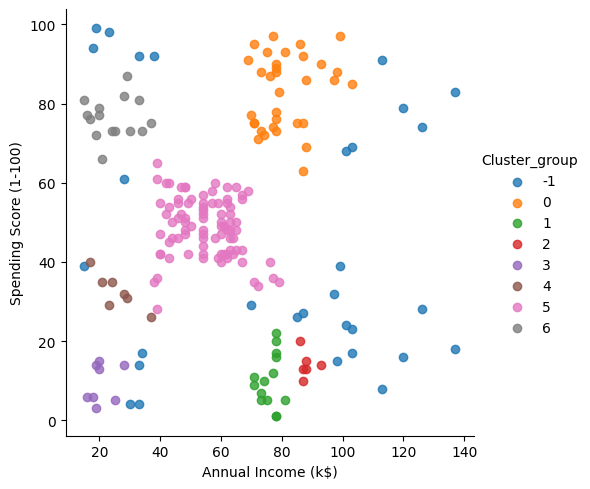

In [24]:
import seaborn as sea
out=sea.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], fit_reg=False)

### 5.Evaluation Metric

In [25]:
from sklearn.metrics import davies_bouldin_score
result=davies_bouldin_score(X, y_mean)
result

1.5878799893404063

In [28]:
from sklearn.metrics import silhouette_score
result=silhouette_score(X,y_mean)
result

0.3494204072121494